# Descriptive Analyses

Intro tables to give context to the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")

STUDY_ID ="60b37265a9f60881975de69e"


In [2]:
participants = pd.read_csv(f"../data/processed/{STUDY_ID}-participants.csv",index_col=0)
posts = pd.read_csv(f"../data/processed/{STUDY_ID}-rumour-results.csv",index_col=0)
reshare_rates = pd.read_csv(f"../data/processed/{STUDY_ID}-reshare_rates.csv")
post_study = pd.read_csv(f"../data/processed/{STUDY_ID}-post-study-responses.csv",index_col=0)
print("Shape: {}x{}".format(*reshare_rates.shape))
reshare_rates.head()

Shape: 182x50


,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,...,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
0,-1215181517757144147,1,2021-06-03 16:58:44.576000+00:00,highSchool,none,False,21,1,0,0,...,0,0,1,Treatment,High,0.4,0.7,0.25,1.00,0.363636
1,-1215181517757144147,1,2021-06-03 16:58:44.576000+00:00,highSchool,none,False,21,1,0,0,...,0,0,1,Treatment,Low,0.1,0.6,0.50,0.50,0.142857
2,-1318326512633013052,1,2021-06-03 16:56:16.209000+00:00,highSchool,centreLeft,True,20,1,0,0,...,1,0,0,Control,High,0.2,0.0,0.25,0.75,1.000000
3,-1318326512633013052,1,2021-06-03 16:56:16.209000+00:00,highSchool,centreLeft,True,20,1,0,0,...,1,0,0,Control,Low,0.1,0.1,0.00,0.00,0.500000
4,-1462427624728782391,1,2021-06-03 16:54:39.051000+00:00,undergrad,centreLeft,False,62,1,0,0,...,0,0,1,Control,High,0.1,0.1,0.00,0.00,0.500000


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [3]:
from tableone import TableOne
table_one = TableOne(participants.reset_index().drop(["user_id","timeSubmitted","consent"],
                                                     axis=1))
table_one

Missing      Overall
n                                                                                                                        91
educationLevel, n (%)                                                                 communityCollege       0    11 (12.1)
                                                                                      doctorate                     1 (1.1)
                                                                                      graduateSchool              12 (13.2)
                                                                                      highSchool                  18 (19.8)
                                                                                      none                          1 (1.1)
                                                                                      undergrad                   48 (52.7)
politicalAffiliation, n (%)                                                           centre                 0    13 (14.3)
                                                                                      centreLeft                  31 (34.1)
                                                                                      centreRight                 11 (12.1)
                                                                                      left                        23 (25.3)
                                                                                      none                        10 (11.0)
                                                                                      right                         3 (3.3)
attendsProtests, n (%)                                                                False                  3    74 (84.1)
                                                                                      True                        14 (15.9)
age, mean (SD)                                                                                               0  31.2 (11.5)
gender_man, mean (SD)                                                                                        0    0.5 (0.5)
gender_nonBinary, mean (SD)                                                                                  0    0.0 (0.1)
gender_woman, mean (SD)                                                                                      0    0.5 (0.5)
affiliatedMovements_ retirement...), mean (SD)                                                               0    0.0 (0.1)
affiliatedMovements_ women's equity (not "Gender"), mean (SD)                                                0    0.0 (0.0)
affiliatedMovements_Animal Welfare, mean (SD)                                                                0    0.0 (0.1)
affiliatedMovements_Anti-Extradition Law Amendment Bill Movement, mean (SD)                                  0    0.0 (0.0)
affiliatedMovements_Change animal cruelty laws , mean (SD)                                                   0    0.0 (0.1)
affiliatedMovements_LGB rights (none of that other alphabet-soup nonsense), mean (SD)                        0    0.0 (0.0)
affiliatedMovements_Pro-choice, mean (SD)                                                                    0    0.0 (0.0)
affiliatedMovements_Socioeconomic inequalities (healthcare, mean (SD)                                        0    0.0 (0.1)
affiliatedMovements_climate, mean (SD)                                                                       0    0.8 (0.4)
affiliatedMovements_free apartheid of Palestinians , mean (SD)                                               0    0.0 (0.0)
affiliatedMovements_freeSpeech, mean (SD)                                                                    0    0.6 (0.5)
affiliatedMovements_gender, mean (SD)                                                                        0    0.8 (0.4)
affiliatedMovements_indigenous, mean (SD)                                                                    0    0.6 (0.5)
affiliatedM

### Experiment descriptive statistics

In [4]:
table_two = TableOne(posts.reset_index().drop(["user_id","timeSubmitted","rumour","evidence","code","posterId","id"],
                                              axis=1),
                     groupby=["condition","evidence"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition                                                  
                                            Missing       Overall       control     treatment P-Value
n                                                            5152          3024          2128        
secondsTaken, mean (SD)                           0  102.3 (25.8)   98.4 (26.6)  108.0 (23.7)  <0.001
warning, n (%)          False                     0   4544 (88.2)  3024 (100.0)   1520 (71.4)  <0.001
                        True                           608 (11.8)                  608 (28.6)        
reshared, n (%)         False                     0   4366 (84.7)   2596 (85.8)   1770 (83.2)   0.010
                        True                           786 (15.3)    428 (14.2)    358 (16.8)        
clickedWarning, n (%)   False                     0   5142 (99.8)  3024 (100.0)   2118 (99.5)  <0.001
                        True                             10 (0.2)                    10 (0.5)        
timestamp, mean (SD)                              0   30.1 (17.0)   30.3 (17.0)   29.9 (17.0)   0.481
posterGender, n (%)     female                    0   2556 (49.6)   1465 (48.4)   1091 (51.3)   0.049
                        male                          2596 (50.4)   1559 (51.6)   1037 (48.7)

In [5]:
table_three = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Affirms")
table_three

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.131481,0.137838
Low,0.111111,0.091892


In [6]:
table_four = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Denies")
table_four

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.066667,0.089189
Low,0.214815,0.329730


In [7]:
table_five = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].mean().T
table_five

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition   Control           Treatment          
evidence       High       Low      High       Low
Affirms    0.131481  0.111111  0.137838  0.091892
Denies     0.066667  0.214815  0.089189  0.329730

### Other Basic Questions

1. How frequently do users click on the warning?

#### How frequently do users click on the warning?

In [8]:
treat = posts[(posts["condition"]=='treatment') & posts["warning"]].reset_index()
num_treat = len(treat["user_id"].unique())
clicked_warning = treat[treat["clickedWarning"]]
num_clicked = len(clicked_warning["user_id"].unique())
print(f"{100*(num_clicked/num_treat):.2f}% ({num_clicked}/{num_treat}) of participants clicked a warning")


18.42% (7/38) of participants clicked a warning


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print(f"Credibility indicators were only clicked on {100*len(clicked_warning)/len(treat):.2f}% ({len(clicked_warning)}/{len(treat)}) of the time")

Credibility indicators were only clicked on 1.64% (10/608) of the time


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

In [10]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['condition','code','evidence'],key=lambda x: x.map(sorting_dict))
af_di = melted[melted["code"].isin(["Affirms","Denies"])]

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


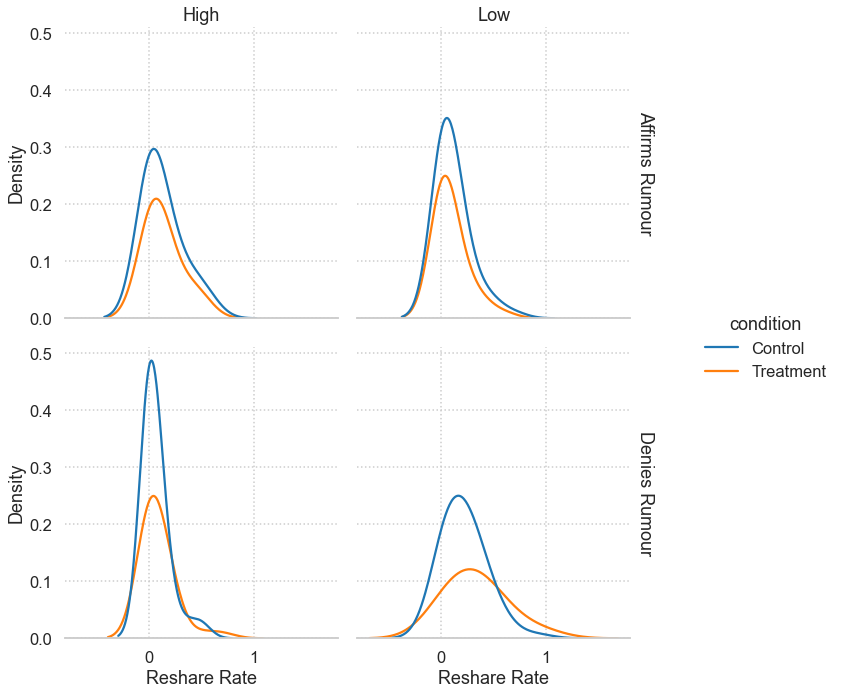

In [11]:
g = sns.displot(data=af_di, 
            x="reshared",
            hue="condition",
            col="evidence",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
sns.despine(left=True)
g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


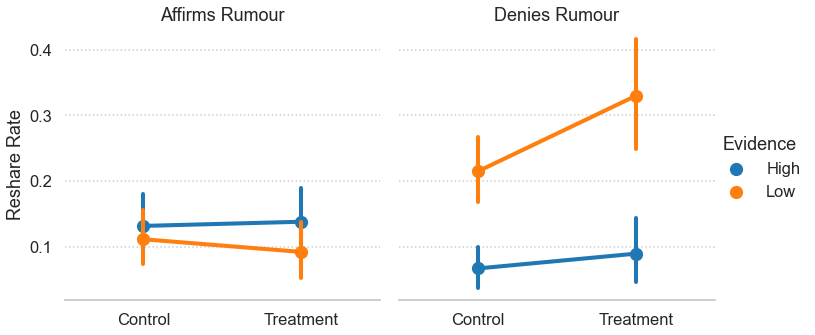

In [12]:
g = sns.catplot(data=af_di, 
            x="condition",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="")
g._legend.set_title("Evidence")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

**For seeing how to describe this plot. Look at Pennycook's Nature article.**

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


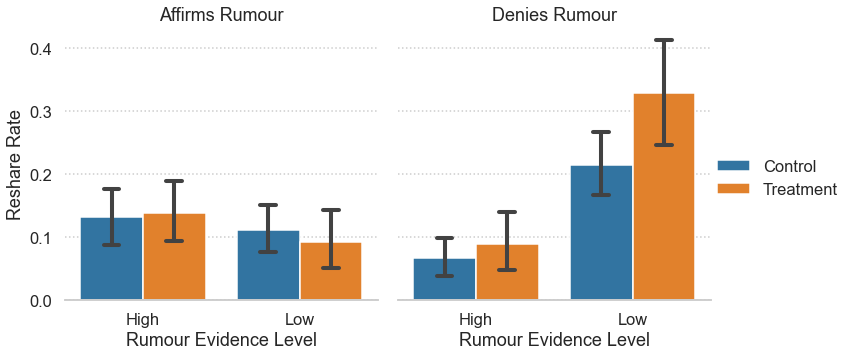

In [13]:
g = sns.catplot(data=af_di, 
            x="evidence",
            y="reshared",
            hue="condition",
            col="code",
            col_wrap=2,
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-bar_plot.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-cb041c13f34e>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  rumour_prop = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],


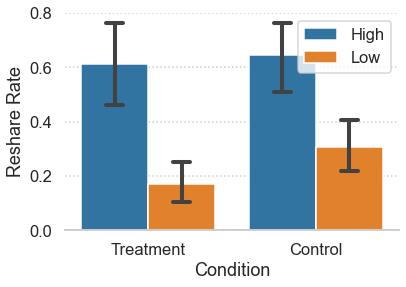

In [14]:
rumour_prop = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars="rumour_proportion",
                            var_name='code', 
                            value_name='rumour_proportion')
g = sns.barplot(data=rumour_prop, 
            x="condition",
            y="rumour_proportion",
            hue="evidence",
            capsize=.1)
g.set(ylabel="Reshare Rate",xlabel="Condition")
plt.legend(title='')

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(condition)*C(evidence)",#" + (1 | user_id) + age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Affirms   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6769
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.567
Time:                        16:09:59   Log-Likelihood:                 77.153
No. Observations:                 182   AIC:                            -146.3
Df Residuals:                     178   BIC:                            -133.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.1315      0.022      6.034      0.000       0.088       0.174
C(condition)[T.Treatment]                        0.0064      0.034      0.186      0.853      -0.061       0.074
C(evidence)[T.Low]                              -0.0204      0.031     -0.661      0.509      -0.081       0.040
C(condition)[T.Treatment]:C(evidence)[T.Low]    -0.0256      0.048     -0.529      0.597      -0.121       0.070
==============================================================================
Omnibus:                       48.834   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.456
Skew:                           1.453   Prob(JB):                     5.58e-18
Kurtosis:                       4.427   Cond. No.                         6.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sum_sq,df,F,PR(>F)
C(condition),0.001816,1.0,0.070833,0.790436
C(evidence),0.043077,1.0,1.679887,0.196617
C(condition):C(evidence),0.007181,1.0,0.280034,0.597338
Residual,4.564409,178.0,NaN,NaN


In [17]:
md2 = smf.mixedlm(f"Affirms ~ C(condition)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["user_id"]).fit()
md2.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
=======================================================================================
Model:                        MixedLM            Dependent Variable:            Affirms
No. Observations:             182                Method:                        REML   
No. Groups:                   91                 Scale:                         0.0119 
Min. group size:              2                  Log-Likelihood:                80.9283
Max. group size:              2                  Converged:                     Yes    
Mean group size:              2.0                                                      
---------------------------------------------------------------------------------------
                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                     0.131    0.022  6.034 0.000  0.089  0.174
C(condition)[T.Treatment]                     0.006    0.034  0.186 0.852 -0.061  0.073
C(evidence)[T.Low]                           -0.020    0.021 -0.970 0.332 -0.062  0.021
C(condition)[T.Treatment]:C(evidence)[T.Low] -0.026    0.033 -0.777 0.437 -0.090  0.039
Group Var                                     0.014    0.038                           
=======================================================================================

"""